# Overview

Basic data exploration for recognizing patterns and getting a sense of the dataset.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [3]:
# Import files

# Location A
x_target_A = pd.read_parquet("../data/A/train_targets.parquet")
x_train_obs_A = pd.read_parquet("../data/A/X_train_observed.parquet")
x_train_est_A = pd.read_parquet("../data/A/X_train_estimated.parquet")
x_test_A = pd.read_parquet("../data/A/X_test_estimated.parquet")

# Location B
x_target_B = pd.read_parquet("../data/B/train_targets.parquet")
x_train_obs_B = pd.read_parquet("../data/B/X_train_observed.parquet")
x_train_est_B = pd.read_parquet("../data/B/X_train_estimated.parquet")
x_test_B = pd.read_parquet("../data/B/X_test_estimated.parquet")

# Location C
x_target_C = pd.read_parquet("../data/C/train_targets.parquet")
x_train_obs_C = pd.read_parquet("../data/C/X_train_observed.parquet")
x_train_est_C = pd.read_parquet("../data/C/X_train_estimated.parquet")
x_test_C = pd.read_parquet("../data/C/X_test_estimated.parquet")

In [10]:
# Import custom files
obs_A = pd.read_parquet("../preprocessing/data/obs_A.parquet")
est_A = pd.read_parquet("../preprocessing/data/est_A.parquet")
test_A = pd.read_parquet("../preprocessing/data/test_A.parquet")

obs_B = pd.read_parquet("../preprocessing/data/obs_B.parquet")
est_B = pd.read_parquet("../preprocessing/data/est_B.parquet")
test_B = pd.read_parquet("../preprocessing/data/test_B.parquet")

obs_C = pd.read_parquet("../preprocessing/data/obs_C.parquet")
est_C = pd.read_parquet("../preprocessing/data/est_C.parquet")
test_C = pd.read_parquet("../preprocessing/data/test_C.parquet")

In [11]:
# Explore parameters
# print(x_target_A.head())
# print(x_target_A.describe())
# x_target_A.info()
print(obs_A.columns)

# print(x_train_obs_A.head())
# print(x_train_obs_A.describe())
# x_train_obs_A.info()
print(est_A.columns)

# print(x_train_est_A.head())
# print(x_train_est_A.describe())
# x_train_est_A.info()
print(test_A.columns)

Index(['pv_measurement', 'absolute_humidity_2m:gm3', 'air_density_2m:kgm3',
       'clear_sky_rad:W', 'dew_point_2m:K', 'diffuse_rad:W', 'direct_rad:W',
       'effective_cloud_cover:p', 'elevation:m', 'is_day:idx',
       'is_in_shadow:idx', 'msl_pressure:hPa', 'pressure_100m:hPa',
       'pressure_50m:hPa', 'relative_humidity_1000hPa:p', 'sfc_pressure:hPa',
       'snow_water:kgm2', 'sun_azimuth:d', 'sun_elevation:d', 't_1000hPa:K',
       'total_cloud_cover:p', 'visibility:m', 'wind_speed_10m:ms',
       'wind_speed_u_10m:ms', 'wind_speed_v_10m:ms', 'clear_sky_energy_1h:J',
       'diffuse_rad_1h:J', 'direct_rad_1h:J', 'month', 'year', 'time_of_day',
       'calc_time_before'],
      dtype='object')
Index(['pv_measurement', 'absolute_humidity_2m:gm3', 'air_density_2m:kgm3',
       'clear_sky_rad:W', 'dew_point_2m:K', 'diffuse_rad:W', 'direct_rad:W',
       'effective_cloud_cover:p', 'elevation:m', 'is_day:idx',
       'is_in_shadow:idx', 'msl_pressure:hPa', 'pressure_100m:hPa',
    

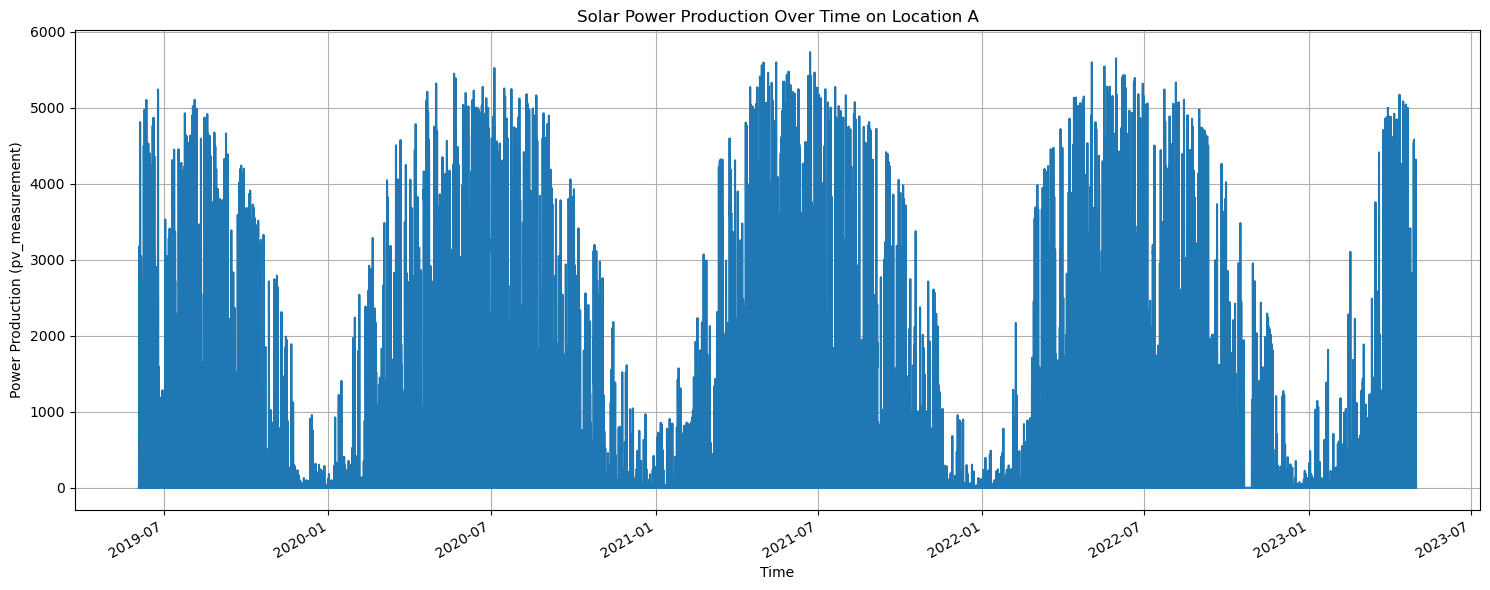

In [5]:
# Plotting for Location A

# Set the time column as the index
x_target_A.set_index('time', inplace=True)

# Plotting the data
plt.figure(figsize=(15, 6))
x_target_A['pv_measurement'].plot()
plt.title('Solar Power Production Over Time on Location A')
plt.xlabel('Time')
plt.ylabel('Power Production (pv_measurement)')
plt.grid(True)
plt.tight_layout()
plt.show()

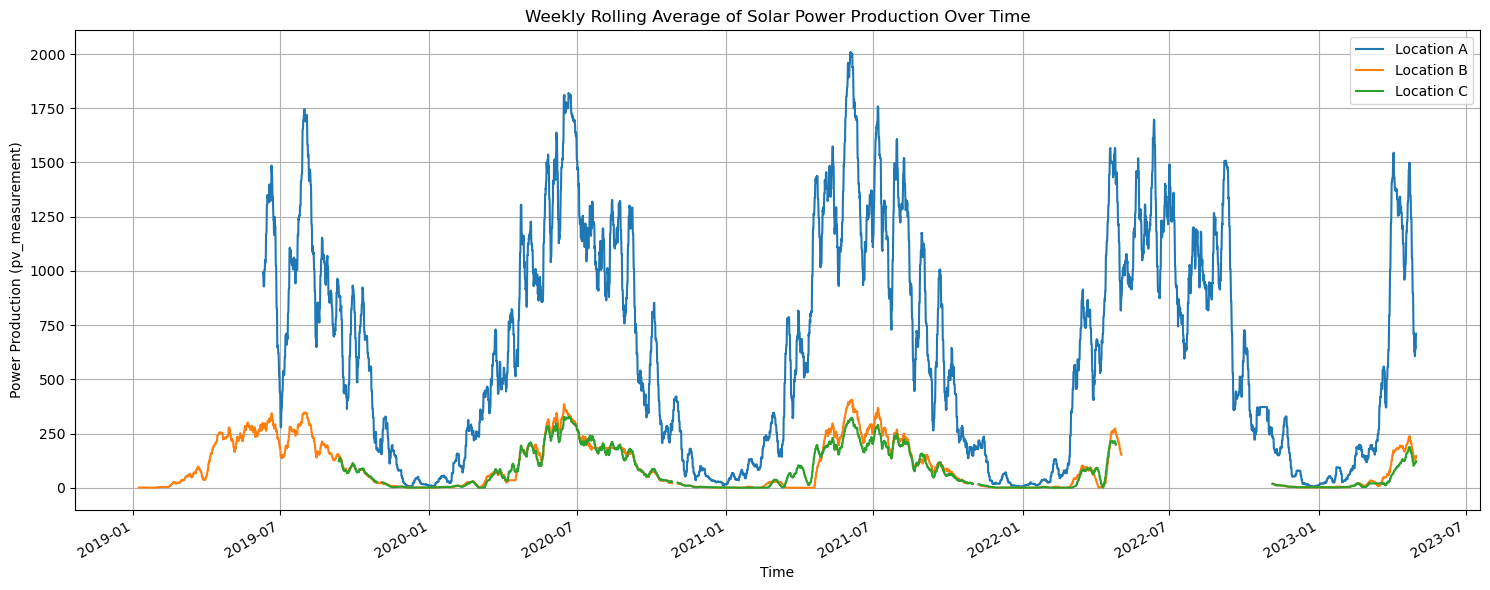

In [6]:
# Plotting weekly averages for all locations

# Assuming x_target_B and x_target_C are already loaded and have the same structure as x_target_A
x_target_B.set_index('time', inplace=True)
x_target_C.set_index('time', inplace=True)

# Define the rolling window size
window_size = 168  # 7 days (168 hours) for a weekly rolling average

# Plotting the data with rolling average
plt.figure(figsize=(15, 6))

x_target_A['pv_measurement'].rolling(window=window_size).mean().plot(label='Location A')
x_target_B['pv_measurement'].rolling(window=window_size).mean().plot(label='Location B')
x_target_C['pv_measurement'].rolling(window=window_size).mean().plot(label='Location C')

plt.title('Weekly Rolling Average of Solar Power Production Over Time')
plt.xlabel('Time')
plt.ylabel('Power Production (pv_measurement)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



---

## Observations on Missing Data Points

Upon visual inspection of the time series plots for solar power production across the three locations (A, B, and C), it's evident that there are periods with missing data points. These gaps in the data are characterized by abrupt discontinuities in the plotted curves.

- **Location A**: The time series for this location shows that the amplitude are greater than the other locations, and it's a complete timeline.
  
- **Location B**: Missing data points are observed during 2022 and some jumps in 2021.
  
- **Location C**: The plot indicates data discontinuities around 2022 and som jumps in 2021.

It's crucial to address these missing values, especially if they span long durations, as they can impact the accuracy and reliability of any predictive models built using this data. Potential strategies to handle these gaps include data imputation, leveraging data from other similar time periods or locations, or excluding the affected periods from the analysis, depending on the project's objectives and the nature of the missing data.

---


In [7]:
# Finding outliers using Z-score

std_A = x_target_A['pv_measurement'].std()
std_B = x_target_B['pv_measurement'].std()
std_C = x_target_C['pv_measurement'].std()

print(f"Standard deviation for A: {std_A}")
print(f"Standard deviation for B: {std_B}")
print(f"Standard deviation for C: {std_C}")

z_scores_A = (x_target_A['pv_measurement'] - x_target_A['pv_measurement'].mean()) / x_target_A['pv_measurement'].std()
z_scores_B = (x_target_B['pv_measurement'] - x_target_B['pv_measurement'].mean()) / x_target_B['pv_measurement'].std()
z_scores_C = (x_target_C['pv_measurement'] - x_target_C['pv_measurement'].mean()) / x_target_C['pv_measurement'].std()

outliers_A_z = x_target_A[(z_scores_A > 3.5) | (z_scores_A < -3.5)]
outliers_B_z = x_target_B[(z_scores_B > 3.5) | (z_scores_B < -3.5)]
outliers_C_z = x_target_C[(z_scores_C > 3.5) | (z_scores_C < -3.5)]

print(f"Number of outliers using Z-score in A: {len(outliers_A_z)}")
print(f"Number of outliers using Z-score in B: {len(outliers_B_z)}")
print(f"Number of outliers using Z-score in C: {len(outliers_C_z)}")



Standard deviation for A: 1165.9024215600493
Standard deviation for B: 193.94648712002967
Standard deviation for C: 165.81687741162926
Number of outliers using Z-score in A: 479
Number of outliers using Z-score in B: 735
Number of outliers using Z-score in C: 562


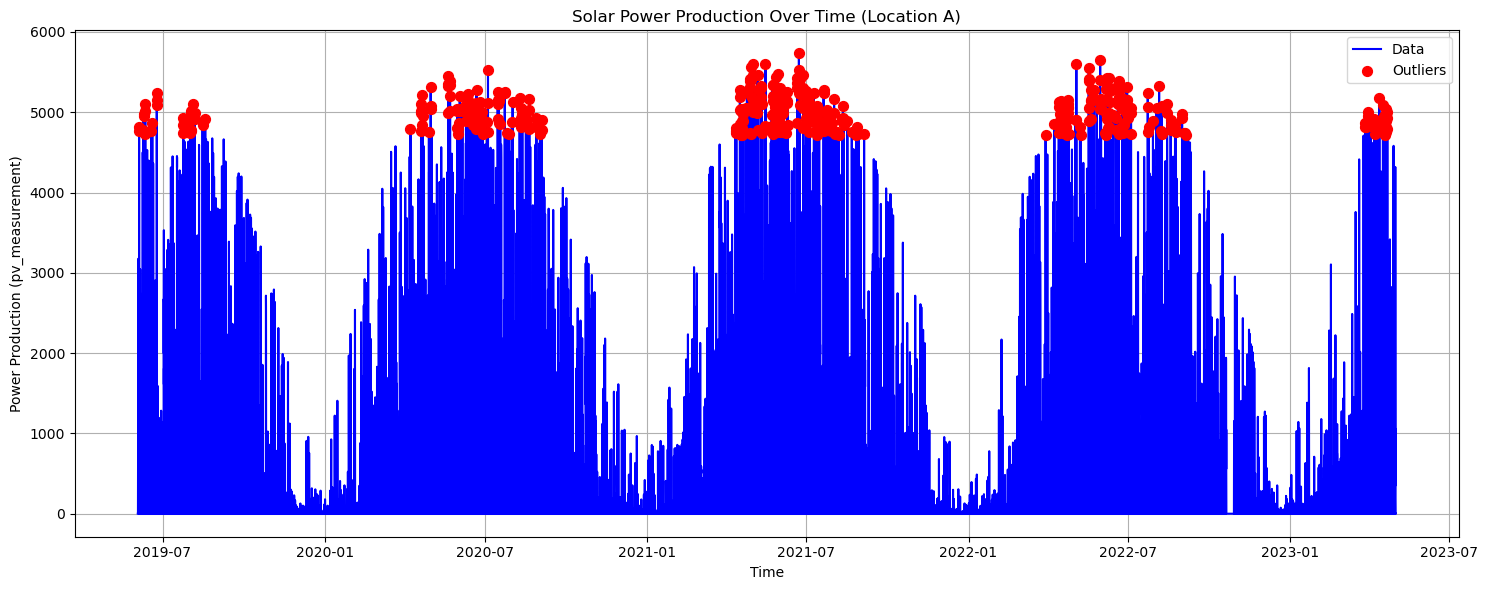

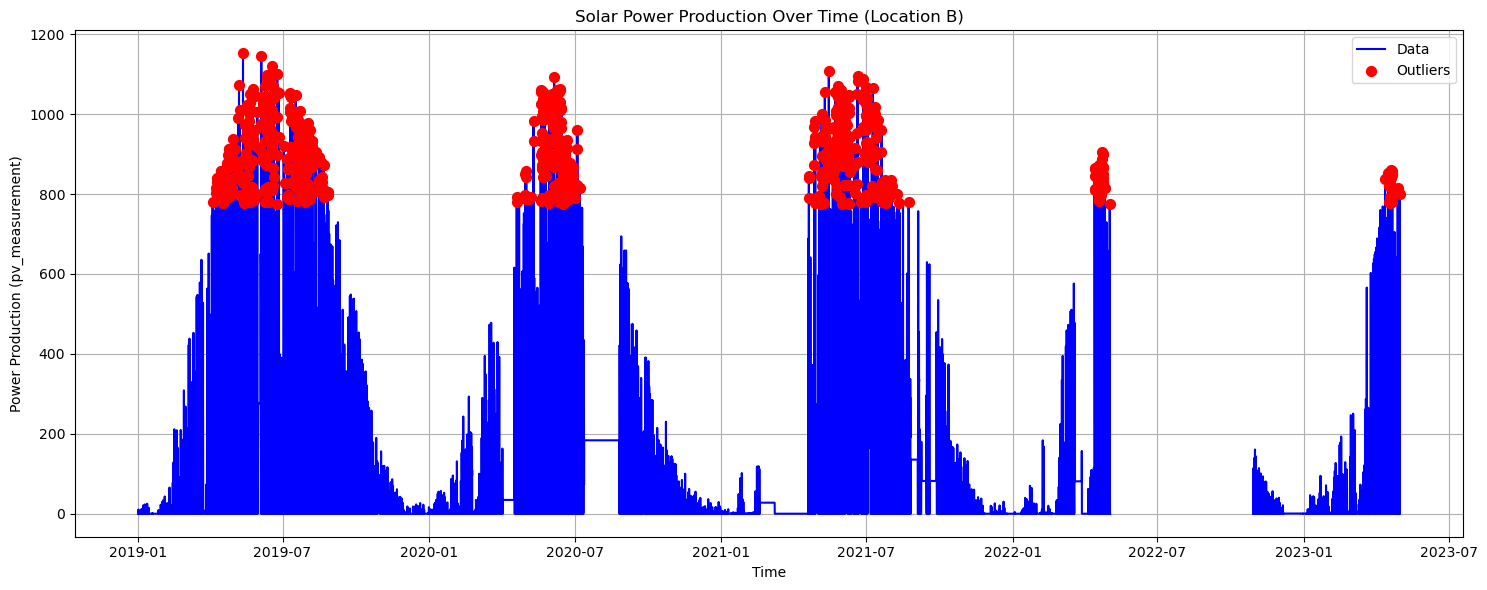

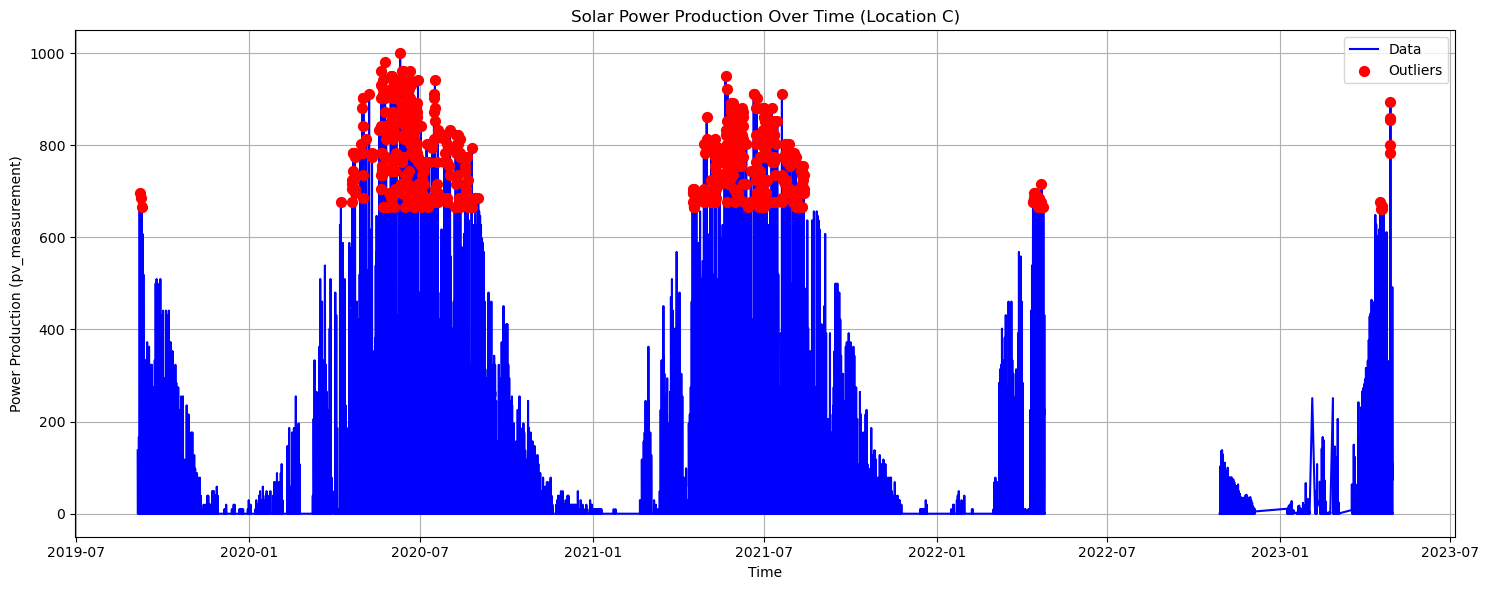

In [8]:
# Function to plot data with outliers
def plot_with_outliers(data, outliers, title):
    plt.figure(figsize=(15, 6))
    
    # Plotting the entire dataset
    plt.plot(data.index, data['pv_measurement'], label='Data', color='blue')
    
    # Highlighting the outliers
    plt.scatter(outliers.index, outliers['pv_measurement'], color='red', label='Outliers', s=50, zorder=5)
    
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Power Production (pv_measurement)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plotting for each location
plot_with_outliers(x_target_A, outliers_A_z, 'Solar Power Production Over Time (Location A)')
plot_with_outliers(x_target_B, outliers_B_z, 'Solar Power Production Over Time (Location B)')
plot_with_outliers(x_target_C, outliers_C_z, 'Solar Power Production Over Time (Location C)')


---

## Observations on Outliers in Solar Power Production Data

Upon visual inspection of the plotted data, it's evident that the outliers are predominantly situated at the peaks of solar power production. 

### Implications:

1. **Genuine Peaks vs. Anomalies**: The consistent occurrence of outliers at the peaks suggests that these might be genuine high production periods rather than anomalies. If these peaks are genuine, removing them might deprive the model of learning from crucial data points.

2. **Model Sensitivity**: Some machine learning models are sensitive to outliers, which can skew the learned relationships. If these peaks are considered outliers, models like linear regression might be disproportionately influenced by them.

3. **Feature Engineering**: Given the consistent nature of these peaks, creating features that capture the conditions leading to these peaks might enhance model performance.

4. **Model Evaluation**: It's essential to evaluate the model's performance with and without these peak values. If the model performs significantly better without them, it might be worth considering strategies like data transformation or using models robust to outliers.

---


